# import statements

In [12]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# custom method

In [3]:
def setup_logging():
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(funcName)s | %(message)s',
        handlers=[
            # logging.StreamHandler(),
            logging.FileHandler('75-ipynb.log')
        ]
    )
    logging.info("Logging setup complete.")


def fetch_df(file_path: str) -> pd.DataFrame:

    try:
        df = pd.read_csv(f'data/{file_path}')
    except FileNotFoundError as notfound_err:
        logging.error(f"File not found: {file_path}. Error: {notfound_err}")
        raise notfound_err
    except pd.errors.EmptyDataError as empty_err:
        logging.error(f"Empty data error for file: {file_path}. Error: {empty_err}")
        raise empty_err
    except pd.errors.ParserError as parse_err:
        logging.error(f"Parser error for file: {file_path}. Error: {parse_err}")
        raise parse_err 
    except Exception as e:
        logging.error(f"Error loading DataFrame from {file_path}: {e}")
        raise e
    else:
        logging.info(f'Dataframe loaded successfully. Shape: {df.shape}')
        return df

# Data Exploration - Making Sense of Google Search Data

In [4]:
def log_base_info(df: pd.DataFrame):
    print(f'Dataframe shape: {df.shape}')
    print(f"DataFrame columns: {df.columns.tolist()}")
    print(f"DataFrame Description:\n{df.describe()}")
    has_na = df.isna().values.any()
    print(f'NaN: {has_na}')
    if has_na:
        print(f'NaN count: {df.isna().sum()}')


if __name__ == "__main__":
    setup_logging()

    df_tesla = fetch_df('TESLA Search Trend vs Price.csv')
    log_base_info(df_tesla)
    print(f'Max number in TSLA_WEB_SEARCH: {df_tesla.TSLA_WEB_SEARCH.max()}')

    df_btc_search = fetch_df('Bitcoin Search Trend.csv')
    log_base_info(df_btc_search)
    print(f'Max number in BTC_NEWS_SEARCH: {df_btc_search.BTC_NEWS_SEARCH.max()}')

    df_btc_price = fetch_df('Daily Bitcoin Price.csv')
    log_base_info(df_btc_price)

    df_unemployment = fetch_df('UE Benefits Search vs UE Rate 2004-19.csv')
    log_base_info(df_unemployment)
    print(f'Max number in UE_BENEFITS_WEB_SEARCH: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')



Dataframe shape: (124, 3)
DataFrame columns: ['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE']
DataFrame Description:
       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007
NaN: False
Max number in TSLA_WEB_SEARCH: 31
Dataframe shape: (73, 2)
DataFrame columns: ['MONTH', 'BTC_NEWS_SEARCH']
DataFrame Description:
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000
NaN: False
Max number in BTC_NEWS_SEARCH: 100
Dataframe shape: (2204, 3)
DataFrame columns: ['DATE', 'CLOSE', 'VOLUME']
DataFrame Description:
              CLOSE        VOLUME
count   2

# Data Cleaning - Resampling Time Series Data

In [5]:
if __name__ == "__main__":
    setup_logging()

    df_tesla = fetch_df('TESLA Search Trend vs Price.csv')
    df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

    df_btc_search = fetch_df('Bitcoin Search Trend.csv')
    df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
    print(f'df_btc_search shape: {df_btc_search.shape}')

    df_btc_price = fetch_df('Daily Bitcoin Price.csv')
    df_btc_price = df_btc_price.dropna()
    df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
    df_btc_price_monthly = df_btc_price.resample('ME', on='DATE').last()
    print(f'df_btc_price_monthly shape: {df_btc_price_monthly.shape}')



df_btc_search shape: (73, 2)
df_btc_price_monthly shape: (73, 2)


# Data Visualisation - Tesla Line Charts in Matplotlib

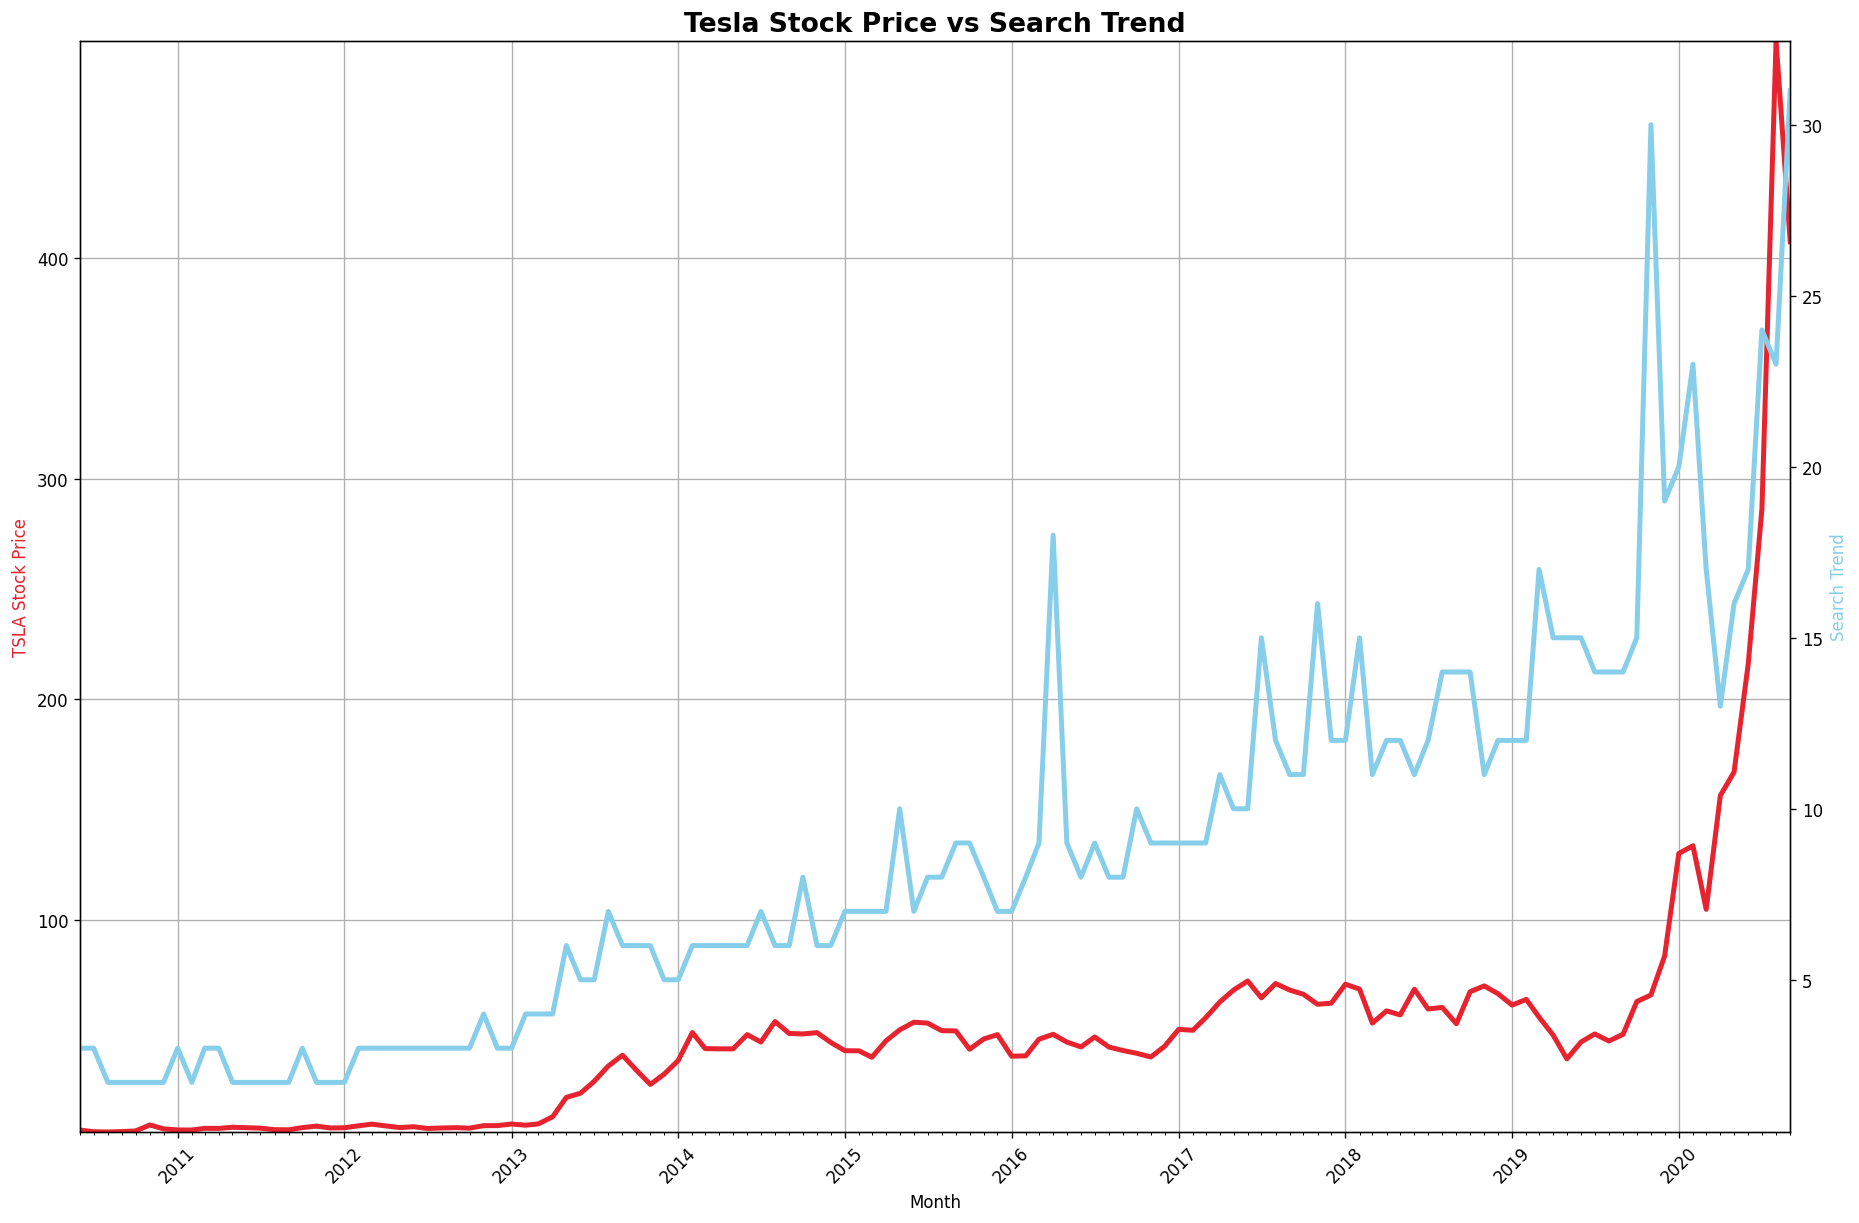

In [14]:
if __name__ == "__main__":
    setup_logging()

    df_tesla = fetch_df('TESLA Search Trend vs Price.csv')
    df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

    plt.figure(figsize=(15, 10), dpi=120)
    plt.title('Tesla Stock Price vs Search Trend', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=10, rotation=45)
    plt.grid()
    plt.tight_layout()

    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%Y')
    # months_fmt = mdates.DateFormatter('%b')
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(years_fmt)
    ax1.xaxis.set_minor_locator(months)

    ax1.set_xlabel('Month', fontsize=10)
    ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=10)
    ax2.set_ylabel('Search Trend', color='skyblue', fontsize=10)

    ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
    ax1.set_ylim([df_tesla.TSLA_USD_CLOSE.min(), df_tesla.TSLA_USD_CLOSE.max()])
    # ax2.set_ylim([df_tesla.TSLA_WEB_SEARCH.min(), df_tesla.TSLA_WEB_SEARCH.max()])

    ax1.plot(
        df_tesla.MONTH, 
        df_tesla.TSLA_USD_CLOSE, 
        color='#E6232E', 
        label='Tesla Stock Price', 
        linewidth=3
    )
    ax2.plot(
        df_tesla.MONTH, 
        df_tesla.TSLA_WEB_SEARCH, 
        color='skyblue', 
        label='Tesla Search Trend',
        linewidth=3
    )

    plt.show()